<a href="https://colab.research.google.com/github/arumugammani02/US_Home-Price-Assessment/blob/main/US_Home_Price_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USA HOUSING PRICE**

**1. Importing libraries**

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**2. Data Gathering and Reading**

In [ ]:
df = pd.read_csv("/content/CSUSHPISA.csv")
df

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [ ]:
df.tail()

,DATE,CSUSHPISA
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155
440,2023-09-01,311.175


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       441 non-null    object 
 1   CSUSHPISA  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


**S&P/Case-Shiller U.S. National Home Price Index**

In [ ]:
Target = pd.read_csv("/content/CSUSHPINSA.csv")
Target.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [ ]:
Target.set_index('DATE', inplace =True)
Target.rename(columns= {'CSUSHPINSA': 'Target'}, inplace =True)
Target.index = pd.to_datetime(Target.index)
Target = Target["1987-01-01":"2023-09-01"]

In [ ]:
Target.shape

(440, 1)

**Population includes resident population plus armed forces overseas**

In [ ]:
populations = pd.read_csv('/content/POPTHM.csv')
populations.head()

,DATE,POPTHM
0,1987-01-01,241857.0
1,1987-02-01,242005.0
2,1987-03-01,242166.0
3,1987-04-01,242338.0
4,1987-05-01,242516.0


In [ ]:
populations.set_index('DATE', inplace =True)
populations.rename(columns= {'POPTHM': 'populations'}, inplace =True)
populations.index = pd.to_datetime(populations.index)
populations = populations["1987-01-01":"2023-09-01"]

In [ ]:
populations.shape

(439, 1)

**Income that persons receive in return for their provision of labor, land, and capital used in current production and the net current transfer payments that they receive from business and from government.**

In [ ]:
income = pd.read_csv('/content/PI.csv')


income.head()

,DATE,PI
0,1987-01-01,3820.2
1,1987-02-01,3845.0
2,1987-03-01,3863.8
3,1987-04-01,3875.4
4,1987-05-01,3908.6


In [ ]:
income.set_index('DATE', inplace =True)
income.rename(columns= {'PI': 'income'}, inplace =True)
income.index = pd.to_datetime(income.index)
income = income["1987-01-01":"2023-09-01"]

In [ ]:
income.shape

(439, 1)

**Featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.**

In [ ]:
gdp = pd.read_csv("/content/GDP.csv")


gdp.head()

,DATE,GDP
0,1987-01-01,4722.156
1,1987-04-01,4806.160
2,1987-07-01,4884.555
3,1987-10-01,5007.994
4,1988-01-01,5073.372


In [ ]:
gdp.set_index('DATE', inplace =True)
gdp.index = pd.to_datetime(gdp.index)

# Resampling
gdp = gdp.resample('M').ffill()

# Set the day of the index to 1
gdp.index = gdp.index.map(lambda x: x.replace(day=1))
gdp = gdp["1987-01-01":"2023-09-01"]

In [ ]:
gdp.shape

(439, 1)

**The unemployment rate represents the number of unemployed as a percentage of the labor force.**

In [ ]:
unemployed_rate = pd.read_csv('/content/UNRATE.csv')


unemployed_rate.head()

,DATE,UNRATE
0,1987-01-01,6.6
1,1987-02-01,6.6
2,1987-03-01,6.6
3,1987-04-01,6.3
4,1987-05-01,6.3


In [ ]:
unemployed_rate.set_index('DATE', inplace =True)
unemployed_rate.rename(columns= {'UNRATE': 'unemployed_rate'}, inplace =True)
unemployed_rate.index = pd.to_datetime(unemployed_rate.index)
unemployed_rate = unemployed_rate["1987-01-01":"2023-09-01"]

In [ ]:
unemployed_rate.shape

(439, 1)

**A mortgage rate is the interest rate charged for a home loan**

In [ ]:
mortgage =pd.read_csv("/content/MORTGAGE30US.csv")


mortgage.head()

,DATE,MORTGAGE30US
0,1987-01-01,9.2040
1,1987-02-01,9.0825
2,1987-03-01,9.0350
3,1987-04-01,9.8325
4,1987-05-01,10.5960


In [ ]:
mortgage.set_index('DATE', inplace =True)
mortgage.rename(columns= {'MORTGAGE30US': 'mortgage_rate'}, inplace =True)
mortgage.index = pd.to_datetime(mortgage.index)
mortgage = mortgage["1987-01-01":"2023-09-01"]

In [ ]:
mortgage.shape

(440, 1)

**Employment-Population Ratio**

In [ ]:
emp_ratio = pd.read_csv("/content/EMRATIO.csv")


emp_ratio.head()

,DATE,EMRATIO
0,1987-01-01,61.0
1,1987-02-01,61.1
2,1987-03-01,61.2
3,1987-04-01,61.3
4,1987-05-01,61.6


In [ ]:
emp_ratio.set_index('DATE', inplace =True)
emp_ratio.rename(columns= {'EMRATIO': 'emp_ratio'}, inplace =True)
emp_ratio.index = pd.to_datetime(emp_ratio.index)
emp_ratio = emp_ratio["1987-01-01":"2023-09 -01"]

In [ ]:
emp_ratio.shape

(439, 1)

**Building Construction issued permit in US**

In [ ]:
permit = pd.read_csv("/content/PERMIT.csv")


permit.head()

,DATE,PERMIT
0,1987-01-01,1690.0
1,1987-02-01,1689.0
2,1987-03-01,1704.0
3,1987-04-01,1601.0
4,1987-05-01,1500.0


In [ ]:
permit.shape

**The participation rate is the percentage of the population that is either working or actively looking for work.**

In [ ]:
labor_percent = pd.read_csv("/content/CIVPART.csv")


labor_percent.head()

,DATE,CIVPART
0,1987-01-01,65.4
1,1987-02-01,65.5
2,1987-03-01,65.5
3,1987-04-01,65.4
4,1987-05-01,65.7


In [ ]:
labor_percent.set_index('DATE', inplace =True)
labor_percent.rename(columns= {'CIVPART': 'labor_percent'}, inplace =True)
labor_percent.index = pd.to_datetime(labor_percent.index)
labor_percent = labor_percent["1987-01-01":"2023-09-01"]

In [ ]:
labor_percent.shape

(439, 1)

**The monthy supply is the ratio of new houses for sale to new houses sold.**

In [ ]:
monthly_supply = pd.read_csv("/content/MSACSR.csv")


monthly_supply.head()

,DATE,MSACSR
0,1987-01-01,6.0
1,1987-02-01,6.2
2,1987-03-01,6.0
3,1987-04-01,6.0
4,1987-05-01,6.7


In [ ]:
monthly_supply.set_index('DATE', inplace =True)
monthly_supply.rename(columns= {'MSACSR': 'monthly_supply'}, inplace =True)
monthly_supply.index = pd.to_datetime(monthly_supply.index)
monthly_supply = monthly_supply["1987-01-01":"2023-09-01"]

In [ ]:
monthly_supply.shape

(439, 1)

**This is a measure of the number of units of new housing projects started in a given period**

In [ ]:
House_starts = pd.read_csv("/content/HOUST.csv")


House_starts.head()

,DATE,HOUST
0,1987-01-01,1774.0
1,1987-02-01,1784.0
2,1987-03-01,1726.0
3,1987-04-01,1614.0
4,1987-05-01,1628.0


In [ ]:
House_starts.set_index('DATE', inplace =True)
House_starts.rename(columns= {'HOUST': 'house_st'}, inplace =True)
House_starts.index = pd.to_datetime(House_starts.index)
House_starts = House_starts["1987-01-01":"2023-09-01"]

In [ ]:
House_starts.shape

(439, 1)

**Construction employees in the construction sector include: Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance.**

In [ ]:
total_emp_cons = pd.read_csv("/content/USCONS.csv")


total_emp_cons.head()

,DATE,USCONS
0,1939-01-01,1139
1,1939-02-01,1162
2,1939-03-01,1225
3,1939-04-01,1249
4,1939-05-01,1262


In [ ]:
total_emp_cons.set_index('DATE', inplace =True)
total_emp_cons.rename(columns= {'USCONS': 'total_emp_cons'}, inplace =True)
total_emp_cons.index = pd.to_datetime(total_emp_cons.index)
total_emp_cons = total_emp_cons["1987-01-01":"2023-09-01"]

In [ ]:
total_emp_cons.shape

(441, 1)

**The homeownership rate is the proportion of households that is owner-occupied.**

In [ ]:
home_ow_rate = pd.read_csv("/content/RSAHORUSQ156S.csv")


home_ow_rate.head()

,DATE,RSAHORUSQ156S
0,1987-01-01,63.9
1,1987-04-01,63.9
2,1987-07-01,64.1
3,1987-10-01,64.1
4,1988-01-01,63.8


In [ ]:
home_ow_rate.set_index('DATE', inplace =True)
home_ow_rate.index = pd.to_datetime(home_ow_rate.index)
home_ow_rate.rename(columns= {'RSAHORUSQ156S': 'home_ow_rate'}, inplace =True)

# Resampling
home_ow_rate = home_ow_rate.resample('M').ffill()

# Set the day of the index to 1
home_ow_rate.index = home_ow_rate.index.map(lambda x: x.replace(day=1))
home_ow_rate = home_ow_rate["1987-01-01":"2023-09-01"]

In [ ]:
home_ow_rate.shape

(439, 1)

**Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI. Personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.**

In [ ]:
p_saving_rate =pd.read_csv("/content/PSAVERT.csv")


p_saving_rate.head()

,DATE,PSAVERT
0,1987-01-01,9.4
1,1987-02-01,8.2
2,1987-03-01,8.1
3,1987-04-01,4.1
4,1987-05-01,7.8


In [ ]:
p_saving_rate.set_index('DATE', inplace =True)
p_saving_rate.rename(columns= {'PSAVERT': 'p_saving_rate'}, inplace =True)
p_saving_rate.index = pd.to_datetime(p_saving_rate.index)
p_saving_rate = p_saving_rate["1987-01-01":"2023-09-01"]

In [ ]:
p_saving_rate.shape

(439, 1)

**New Privately-Owned Housing Construction Completed**

In [ ]:
new_private_house = pd.read_csv("/content/COMPUTSA.csv")


new_private_house.head()

,DATE,COMPUTSA
0,1987-01-01,1862.0
1,1987-02-01,1771.0
2,1987-03-01,1694.0
3,1987-04-01,1735.0
4,1987-05-01,1713.0


In [ ]:
new_private_house.set_index('DATE', inplace =True)
new_private_house.rename(columns= {'COMPUTSA': 'new_private_house'}, inplace =True)
new_private_house.index = pd.to_datetime(new_private_house.index)
new_private_house = new_private_house["1987-01-01":"2023-09-01"]

In [ ]:
new_private_house.shape

(439, 1)

**New Privately-Owned Housing Units Under Construction**

In [ ]:
new_private_under = pd.read_csv("/content/UNDCONTSA.csv")


new_private_under.head()

,DATE,UNDCONTSA
0,1987-01-01,1090.0
1,1987-02-01,1096.0
2,1987-03-01,1084.0
3,1987-04-01,1079.0
4,1987-05-01,1070.0


In [ ]:
new_private_under.set_index('DATE', inplace =True)
new_private_under.rename(columns= {'UNDCONTSA': 'new_private_under'}, inplace =True)
new_private_under.index = pd.to_datetime(new_private_under.index)
new_private_under = new_private_under["1987-01-01":"2023-09-01"]

In [ ]:
new_private_under.shape

(439, 1)

# **Exploratory Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv("/content/datasets.csv")

In [ ]:
df_1.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1987-01-01,9.4,63.735,9.2040,123.7373,100.1,1690.0,4.703204,241857.0,7974.739004,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,1987-02-01,8.2,64.135,9.0825,123.1670,100.8,1689.0,4.703204,242005.0,7502.244305,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,1987-03-01,8.1,64.470,9.0350,122.5706,101.2,1704.0,4.703204,242166.0,7106.570176,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,1987-04-01,4.1,64.973,9.8325,123.5345,100.8,1601.0,4.703204,242338.0,7316.773819,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,1987-05-01,7.8,65.547,10.5960,123.8454,101.2,1500.0,4.697749,242516.0,7203.844501,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   p_saving_rate         439 non-null    float64
 2   target                439 non-null    float64
 3   mortgage_rate         439 non-null    float64
 4   IPI_Cement            439 non-null    float64
 5   PPI_Cement            439 non-null    float64
 6   permit                439 non-null    float64
 7   PPI_Concrete          439 non-null    float64
 8   population            439 non-null    float64
 9   new_private_house     439 non-null    float64
 10  emratio               439 non-null    float64
 11  income                439 non-null    float64
 12  new_private_hw_under  439 non-null    float64
 13  GDP                   439 non-null    float64
 14  home_ow_rate          439 non-null    float64
 15  house_st              4

In [ ]:
df_1.describe()

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,6.148633,141.151487,6.315856,119.565531,176.834228,1355.164009,5.155698,293349.423690,5206.608788,61.368052,...,953.202733,13236.389663,65.777221,1337.020501,6288.307517,65.113440,742.157631,5.876993,5.747153,219945.558087
std,2.075691,60.304741,2.172124,23.911004,57.243653,390.759196,0.272078,28737.180981,1685.524304,2.011510,...,287.403162,5902.255151,1.744104,379.076753,959.538073,1.786754,123.747671,1.675367,1.576956,90045.171678
min,1.400000,63.735000,2.684000,66.350800,100.100000,513.000000,4.697749,241857.000000,1685.483171,55.025000,...,414.000000,4722.156000,63.100000,478.000000,4570.000000,60.100000,542.600000,3.300000,3.400000,97900.000000
25%,4.900000,81.733000,4.316250,101.180200,129.200000,1089.500000,4.958640,268602.000000,4145.299395,59.750000,...,760.000000,7868.468000,64.100000,1103.000000,5424.500000,63.100000,633.150000,4.500000,4.600000,138000.000000
50%,6.100000,141.048000,6.262000,116.904800,171.800000,1381.000000,5.101085,295359.000000,5306.412981,61.900000,...,973.000000,12922.656000,65.500000,1377.000000,6402.000000,66.000000,734.300000,5.600000,5.400000,219000.000000
75%,7.450000,178.937000,7.838000,139.426100,210.050000,1624.000000,5.337538,319331.500000,6357.205695,62.900000,...,1123.000000,17518.508000,67.400000,1582.500000,7092.000000,66.500000,826.250000,6.800000,6.600000,281000.000000
max,11.275000,310.162000,11.260000,192.032200,331.181000,2263.000000,5.821432,335329.000000,10017.121097,64.700000,...,1667.500000,27623.543000,69.400000,2273.000000,7967.000000,67.300000,1022.000000,10.250000,9.600000,479500.000000


**Plotting density plot for all the numerical features**

<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

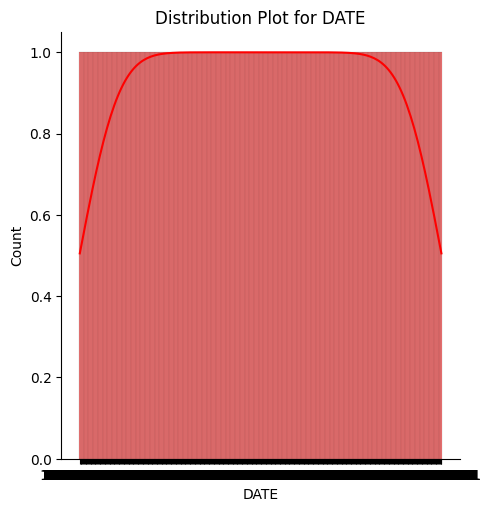

<Figure size 600x400 with 0 Axes>

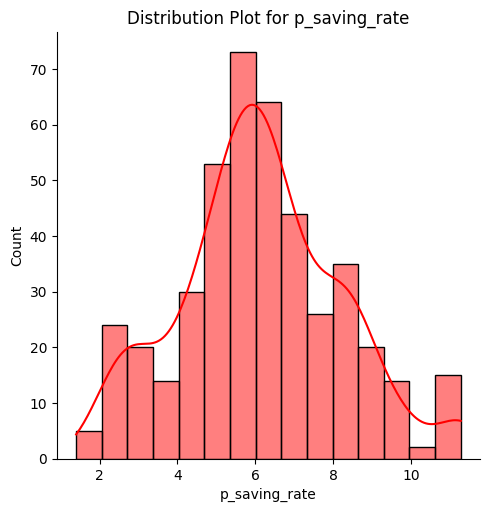

<Figure size 600x400 with 0 Axes>

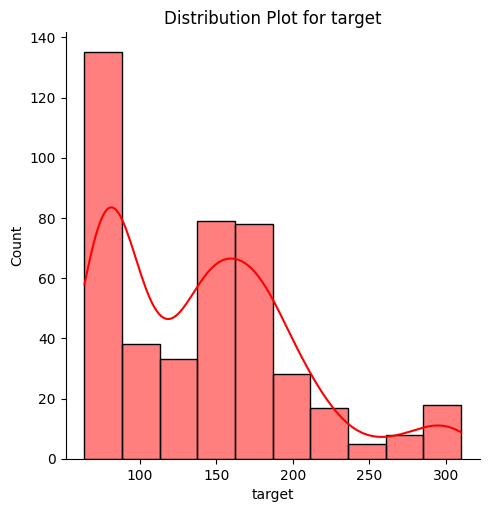

<Figure size 600x400 with 0 Axes>

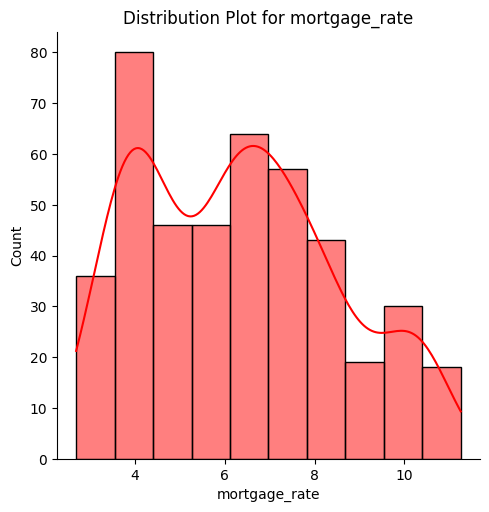

<Figure size 600x400 with 0 Axes>

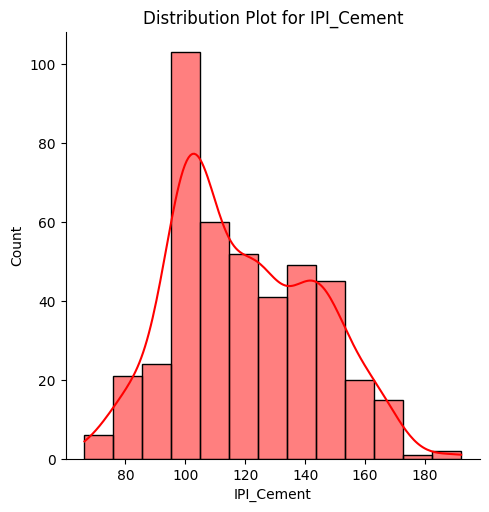

<Figure size 600x400 with 0 Axes>

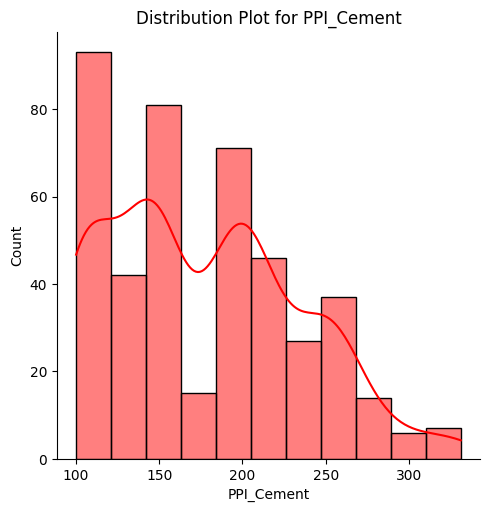

<Figure size 600x400 with 0 Axes>

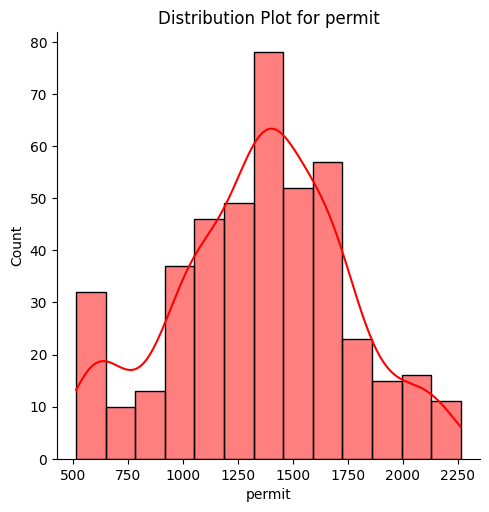

<Figure size 600x400 with 0 Axes>

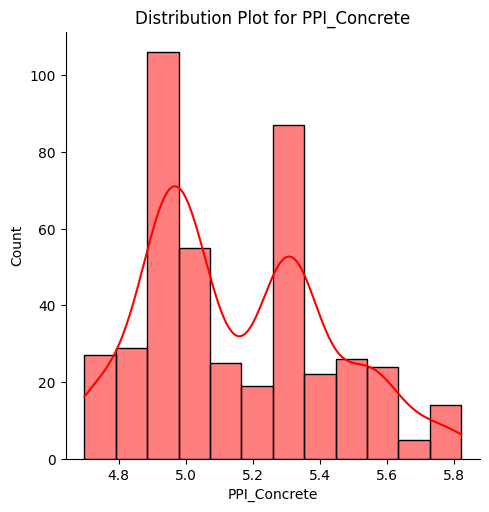

<Figure size 600x400 with 0 Axes>

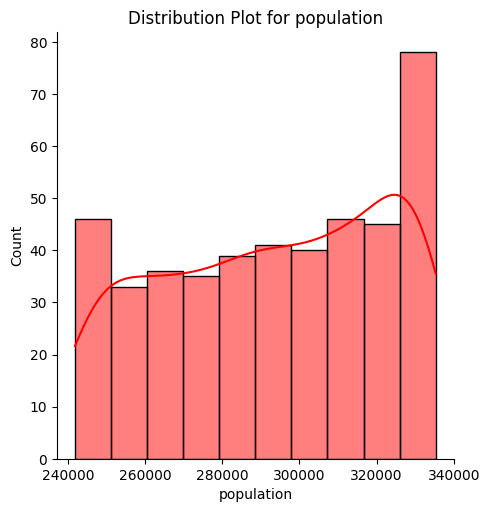

<Figure size 600x400 with 0 Axes>

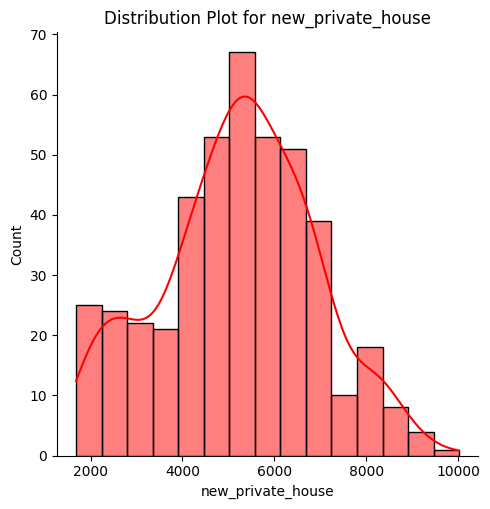

<Figure size 600x400 with 0 Axes>

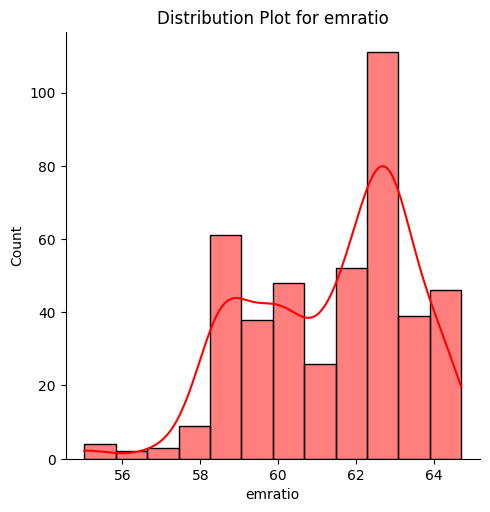

<Figure size 600x400 with 0 Axes>

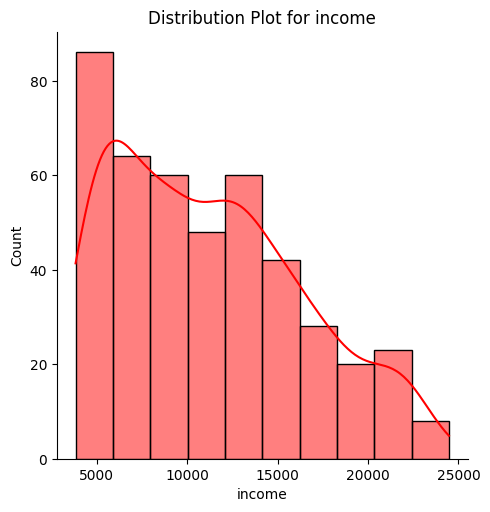

<Figure size 600x400 with 0 Axes>

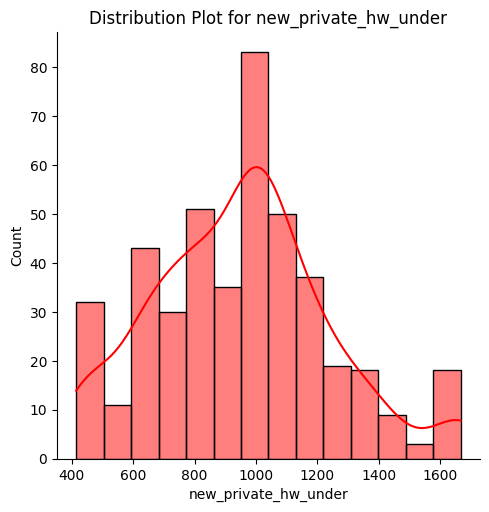

<Figure size 600x400 with 0 Axes>

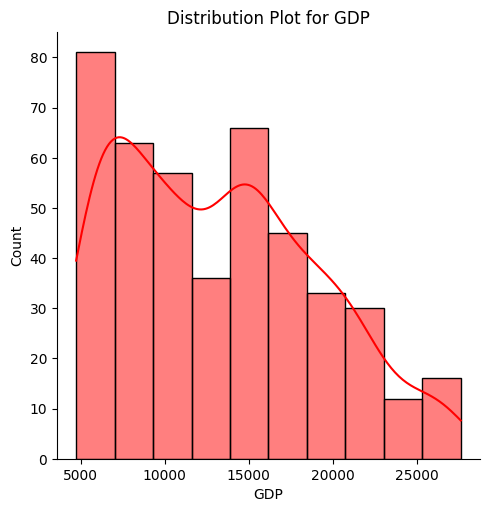

<Figure size 600x400 with 0 Axes>

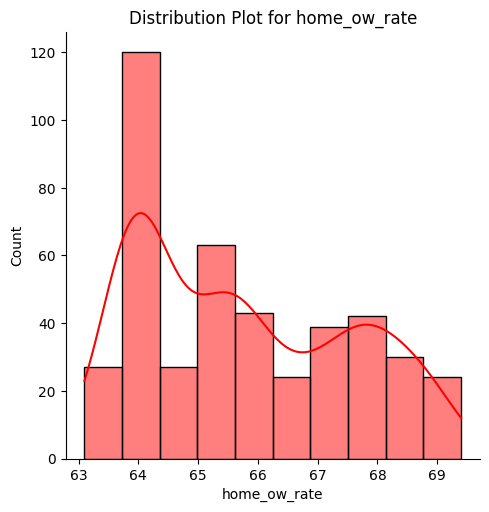

<Figure size 600x400 with 0 Axes>

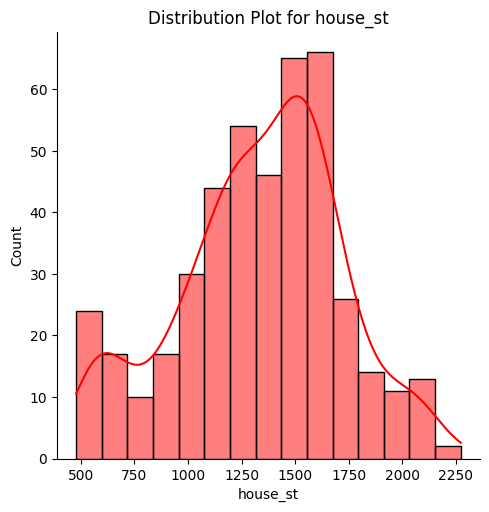

<Figure size 600x400 with 0 Axes>

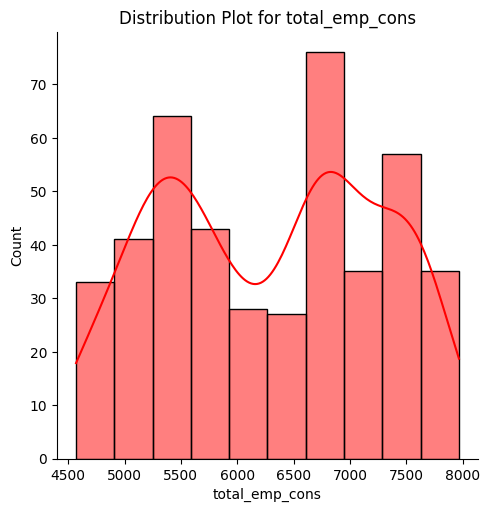

<Figure size 600x400 with 0 Axes>

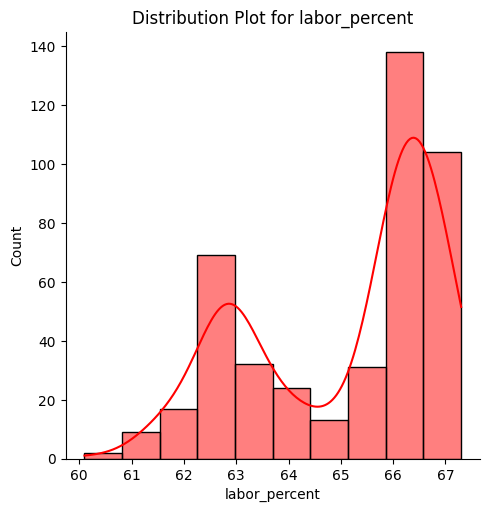

<Figure size 600x400 with 0 Axes>

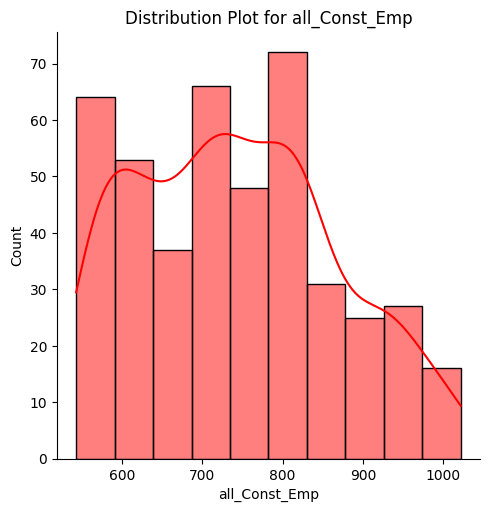

<Figure size 600x400 with 0 Axes>

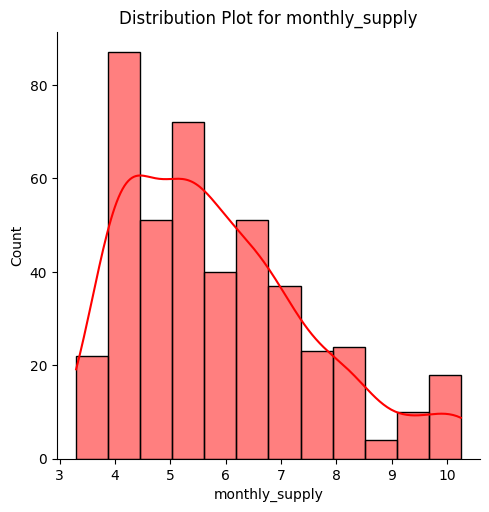

<Figure size 600x400 with 0 Axes>

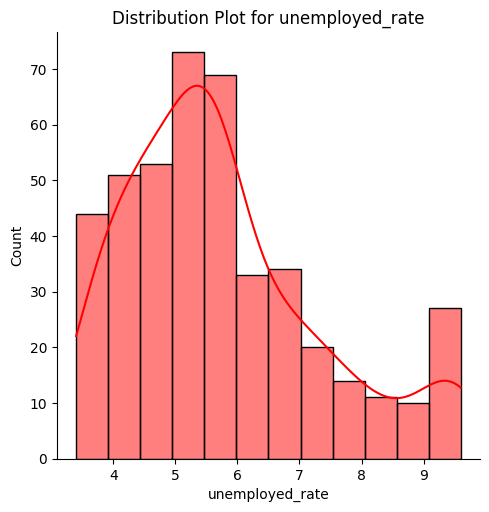

<Figure size 600x400 with 0 Axes>

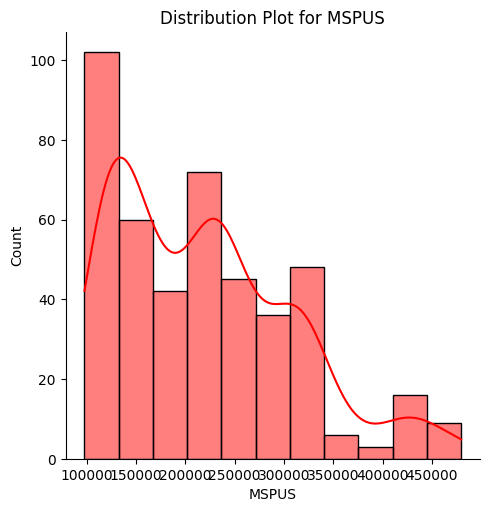

In [ ]:
plt.figure(figsize=(12, 6))
for col in df_1.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_1, x=col, kde =True, color ='red')
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

# **Model Evaluation:**

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
df_1.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1987-01-01,9.4,63.735,9.2040,123.7373,100.1,1690.0,4.703204,241857.0,7974.739004,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,1987-02-01,8.2,64.135,9.0825,123.1670,100.8,1689.0,4.703204,242005.0,7502.244305,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,1987-03-01,8.1,64.470,9.0350,122.5706,101.2,1704.0,4.703204,242166.0,7106.570176,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,1987-04-01,4.1,64.973,9.8325,123.5345,100.8,1601.0,4.703204,242338.0,7316.773819,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,1987-05-01,7.8,65.547,10.5960,123.8454,101.2,1500.0,4.697749,242516.0,7203.844501,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0


**Split the dataset into training and testing sets.**

In [96]:
X = df_1.drop(columns=['DATE', 'target'], axis=1)
y = df_1.target

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training**

In [ ]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=3)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

In [101]:

optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0072
Mean Squared Error (MSE): 19.50
RMSE: 4.415702
R-squared (R2): 0.99


In [ ]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=3, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

In [110]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

print(0.1 * rmse)
print(0.1 * df_1['target'].mean())

Mean R-squared: 0.9950
Standard Deviation of R-squared: 0.0006
0.4415702381363502
14.11514874715262


In [112]:
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

non_zero_coefficients_df

,Feature,Coefficient
0,p_saving_rate,-1.505239
1,mortgage_rate,-2.659486
2,IPI_Cement,1.939807
3,PPI_Cement,-7.762608
4,permit,-1.422671
5,PPI_Concrete,19.589503
6,population,-12.733505
7,new_private_house,0.753116
8,emratio,-2.160474
9,income,0.775346


**Interpretation and Validation:**

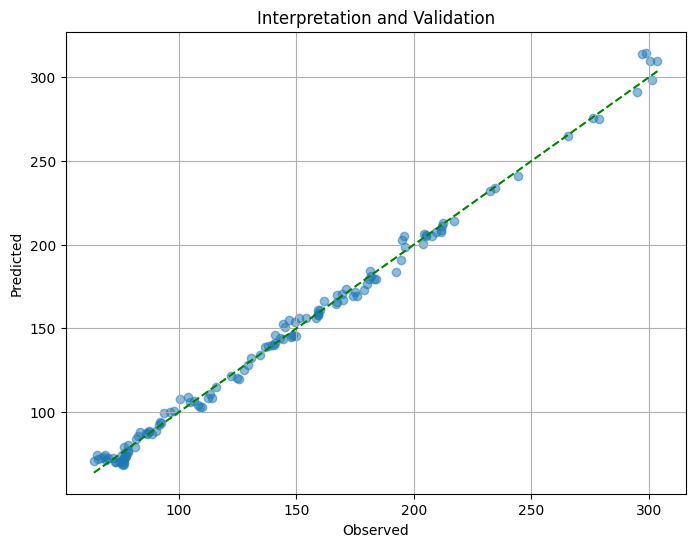

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Interpretation and Validation")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='GREEN', linestyle='--')

plt.show()

**Reporting:**

Features like Median_sales_price, Monthly_supply, Interest_rates top predictors in our model training.

Features like Consumer_sentiment are weak predictors.

Features like Total_consumption spending, GDP, Permit, Housing_inventory are poor predictors.

Although GDP has better correlation but it is poor predictor.